In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

%matplotlib inline

In [16]:
df = pd.read_csv('emnist-letters-train.csv', names=range(0,785))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
tensor_data = tf.constant(df)
tensor_data = tf.random.shuffle(tensor_data)

tensor_data[:5]

<tf.Tensor: shape=(5, 785), dtype=int64, numpy=
array([[24,  0,  0, ...,  0,  0,  0],
       [26,  0,  0, ...,  0,  0,  0],
       [15,  0,  0, ...,  0,  0,  0],
       [21,  0,  0, ...,  0,  0,  0],
       [26,  0,  0, ...,  0,  0,  0]])>

In [19]:
test_data = tf.constant(test)

In [20]:
x_train = tensor_data[:int(len(tensor_data)*0.8), 1:]
y_train = tensor_data[:int(len(tensor_data)*0.8), :1]

In [29]:
x_test = tensor_data[int(len(tensor_data)*0.8):, 1:]
y_test = tensor_data[int(len(tensor_data)*0.8):, :1]

tf.Tensor([9], shape=(1,), dtype=int64)


<Figure size 640x480 with 0 Axes>

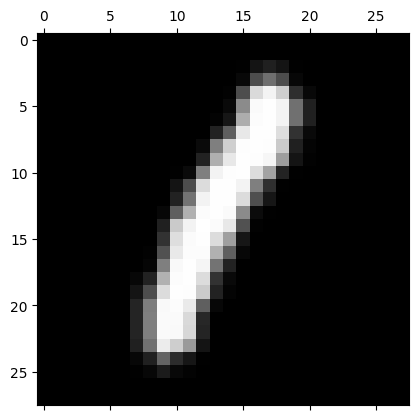

In [22]:
plt.gray()

i = 5
print(y_train[i])
plt.matshow(np.transpose(x_train[i].numpy().reshape(28,28)))

In [23]:
x_train = x_train / 255
x_test = x_test / 255

In [55]:
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(27, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
2220/2220 [==============================] - 9s 4ms/step - loss: 0.6692 - accuracy: 0.7902
Epoch 2/10
2220/2220 [==============================] - 9s 4ms/step - loss: 0.3753 - accuracy: 0.8754
Epoch 3/10
2220/2220 [==============================] - 9s 4ms/step - loss: 0.3084 - accuracy: 0.8969
Epoch 4/10
2220/2220 [==============================] - 9s 4ms/step - loss: 0.2659 - accuracy: 0.9085
Epoch 5/10
2220/2220 [==============================] - 9s 4ms/step - loss: 0.2358 - accuracy: 0.9166
Epoch 6/10
2220/2220 [==============================] - 9s 4ms/step - loss: 0.2141 - accuracy: 0.9243
Epoch 7/10
2220/2220 [==============================] - 9s 4ms/step - loss: 0.1968 - accuracy: 0.9290
Epoch 8/10
2220/2220 [==============================] - 9s 4ms/step - loss: 0.1808 - accuracy: 0.9330
Epoch 9/10
2220/2220 [==============================] - 9s 4ms/step - loss: 0.1724 - accuracy: 0.9373
Epoch 10/10
2220/2220 [==============================] - 9s 4ms/step - loss: 0.164

In [56]:
model.evaluate(x_test, y_test)

555/555 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8921


[0.44073519110679626, 0.8920608162879944]

In [57]:
model.save('model.keras')

In [27]:
np.argmax(model.predict(tf.expand_dims(x_test[0], axis=0)))

1/1 [==============================] - 0s 74ms/step


12

In [28]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([11])>